In [ ]:
from google.colab import drive 
drive.mount('Colab_Notebooks')

In [ ]:
#import pandas package
import pandas as pd
#load csv data into pandas dataframe
import numpy as np
#filtering stopwords
df=pd.read_csv('/content/Colab_Notebooks/MyDrive/2017.csv')
tweets=''
for tweet in df['tweet']:
  tweets += tweet + ' '
tweets

1. Compute word frequencies for each year. Exclude the stop words


In [ ]:
import nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('word_tokenize')
all_words = word_tokenize(tweets)
stop_words = set(stopwords.words('english'))
stop_words.update(['@', ',', 'A', '.', ':', ';', '&', 'I', '!', '’', ')', '(', '🤣', '?', 'The', '“', '”', 'We', 'In', 'It', 'This', 'If'])
filtered_words = []
for word in all_words:
    if word not in stop_words:
        filtered_words.append(word)

word_analysis = nltk.FreqDist(filtered_words)
word_analysis.items()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


dict_items([('neilsiegel', 1), ('Tesla', 308), ('Coming', 12), ('soon', 66), ('Kreative', 1), ('Vastly', 3), ('better', 53), ('maps/nav', 1), ('coming', 44), ('dd_hogan', 1), ('Ok', 11), ('Jason', 1), ('Sure', 8), ('kabirakhtar', 1), ('Yeah', 56), ('terrible', 3), ('Had', 3), ('upgrade', 12), ('old', 9), ('Linux', 6), ('OS', 3), ('bunch', 2), ('drivers', 2), ('first', 66), ('Major', 9), ('browser', 6), ('upgrades', 3), ('cars', 75), ('months', 26), ('Note', 2), ('slower', 3), ('code', 8), ('optimized', 1), ('sustainableanna', 1), ('VanSeedBank', 2), ('Similar', 3), ('total', 6), ('size', 16), ('Maybe', 30), ('slightly', 9), ('bigger', 7), ('account', 3), ('really', 60), ('gamechanging', 1), ('think', 39), ('feature', 7), ('like', 135), ('add', 12), ('IamSamCrompton', 1), ('Sustainable', 1), ('energy', 26), ('production', 40), ('solar', 35), ('batteries', 10), ('grow', 2), ('much', 64), ('faster', 11), ('auto', 15), ('percentage', 1), ('basis', 1), ('That', 74), ('big', 26), ('focus', 2

2.Show top 10 words (for each year) by the highest value of word frequency

In [ ]:
word_analysis.tabulate(10)

 https   http  Tesla     's    n't    amp  Model   like    ... rocket 
   445    411    308    235    224    219    204    135    135    125 


3.Plot histogram of word frequencies for each year

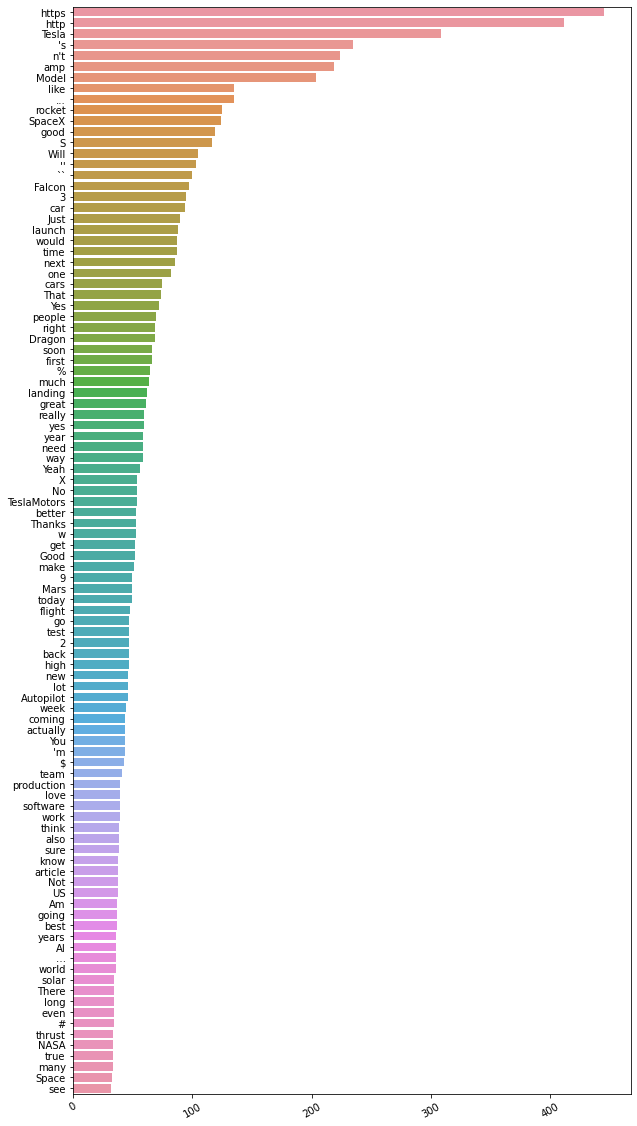

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
word_analysis_data_series = pd.Series(dict(word_analysis.most_common(100)))
# word_analysis_data_series = pd.Series(dict(word_analysis))

fig, ax = plt.subplots(figsize=(10,20))

word_frequency_plot = sns.barplot(y=word_analysis_data_series.index, x=word_analysis_data_series.values, ax=ax)
plt.xticks(rotation=30);

4.Use Zipf’s law and plot log-log plots of word frequencies and rank for each year

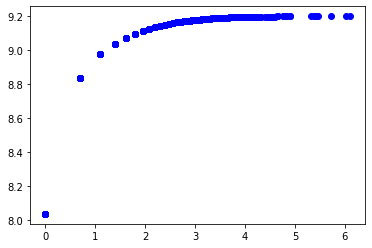

In [ ]:
import scipy.stats as ss
import math
word_rank = ss.rankdata([freq for freq in word_analysis.values()])
log_freq = [math.log(freq) for freq in word_analysis.values()]
log_rank = [math.log(rank) for rank in word_rank]
plt.plot(log_freq, log_rank, 'bo')


5.Create bigram network graphs for each year

In [ ]:
bigram_words = list(nltk.bigrams(filtered_words))
bigram_word_analysis = nltk.FreqDist(bigram_words)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36870 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36578 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27861 missing from current font.
  font.se

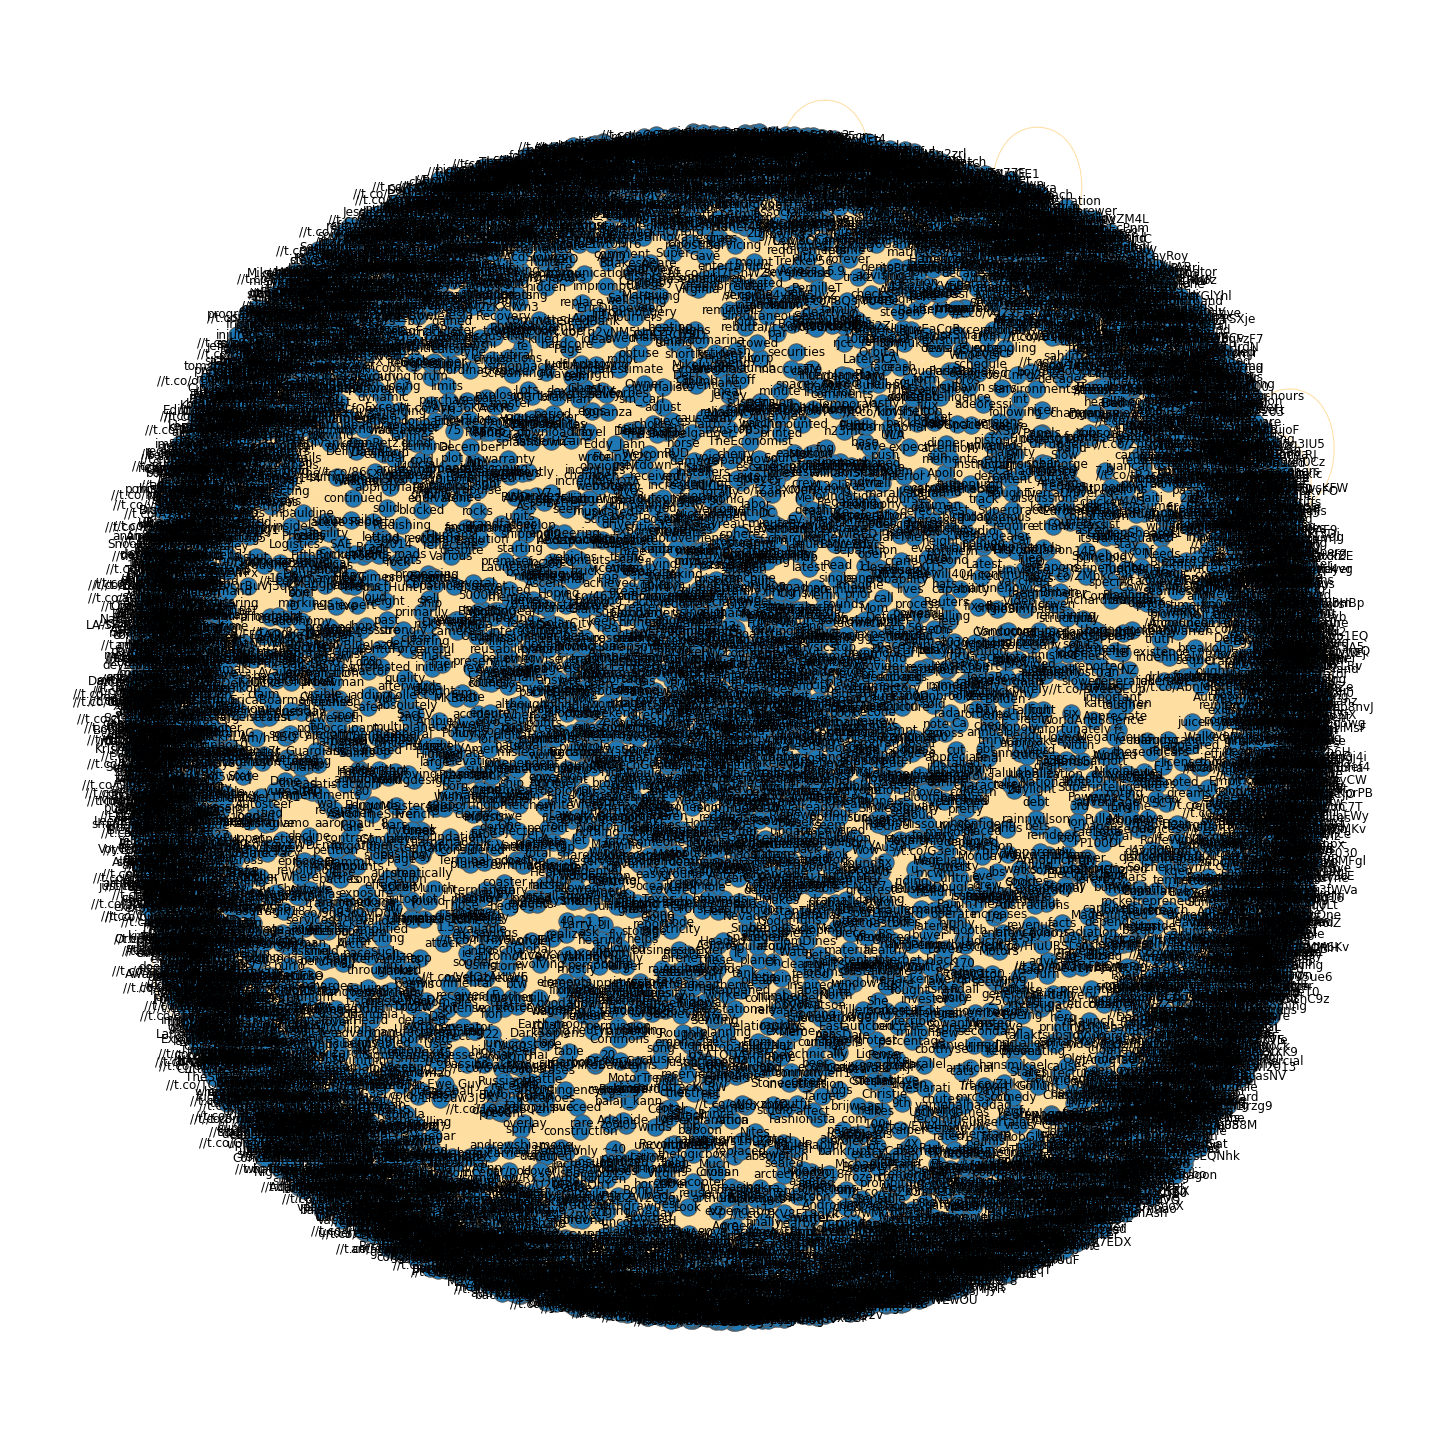

In [ ]:
import networkx as nx
G = nx.Graph()
for index, row in bigram_word_analysis.most_common():
  G.add_weighted_edges_from([(index[0], index[1], row)])  

plt.figure(figsize=(20,20))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
# nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=50))
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()